### Let us start by importing our dependencies

In [44]:
import pandas as pd
import numpy as np
from config import api_key
import requests
import json
import scipy.stats as stats
import matplotlib.pyplot as plt

### In order to answer our questions, we had to look far and wide in order to find data that we could work with!

### Brian looked up information on the [Great American Beer Festival](https://www.greatamericanbeerfestival.com/the-competition/about-the-beer-competition/?fbclid=IwAR34qraQ09Z157dZ78IpMEiVfj8KarPCJMzHOZr5195ne62gafbYBL8wyRQ) that he painstakingly compiled into an Excel spreadsheet. Namely, the last 10 years of data.

### The lists were in PDF format. The data was manually copied and pasted into an Excel workbook and was cleaned and massaged using various techniques.

### Additional data was pulled in from [simple maps](https://simplemaps.com/data/us-cities) as a CSV file in order to assist in using the [VLOOKUP](https://support.office.com/en-us/article/vlookup-function-0bbc8083-26fe-4963-8ab8-93a18ad188a1) function.

### Beers from breweries all around the United States would compete in various categories. Medals would be awarded to the top 3 in that category.


### Question: How do San Diegan breweries compare to other ones?

In [187]:
# Create a dataframe of all award-winning beers since 2009

csv_data = "beer_winners.csv"

all = pd.read_csv(csv_data)
all.columns = ['medal', 'beer_name','brewery',
                       'city','county','state',
                       'category','year','total_category_entries']
all = all.sort_values('year', ascending=False)
all.reset_index(inplace=True)
all_winner_data = all.drop(columns=['index'],axis=1)
print("This is a dataframe with every award-winning beer brewed in the United States since 2009.")
us_number = all_winner_data['medal'].count()
print(f'There is information on {us_number} beers in this dataframe.')
all_winner_data.head()

This is a dataframe with every award-winning beer brewed in the United States since 2009.
There is information on 2646 beers in this dataframe.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries
0,Bronze,Eclipse,FiftyFifty Brewing Co.,Truckee,Nevada,CA,Wood- and Barrel-Aged Strong Stout,2018,177
1,Silver,Märzen,Sudwerk Brewing Co.,Davis,Yolo,CA,American-Style Amber Lager,2018,91
2,Gold,Oktoberfest,SKA Brewing,Durango,La Plata,CO,Vienna-Style Lager,2018,92
3,Gold,Barrel Aged Japance Off,Denver Beer Co. - Olde Town Arvada,Arvada,Jefferson,CO,Wood- and Barrel-Aged Beer,2018,77
4,Gold,3 Barrel Circus,River Dog Brewing Co.,Bluffton,Yell,SC,Wood- and Barrel-Aged Sour Beer,2018,76


### But how popular is the Great American Beer Festival, really?

### Plot # 1 - Total National Entries Over the Past 10 Years

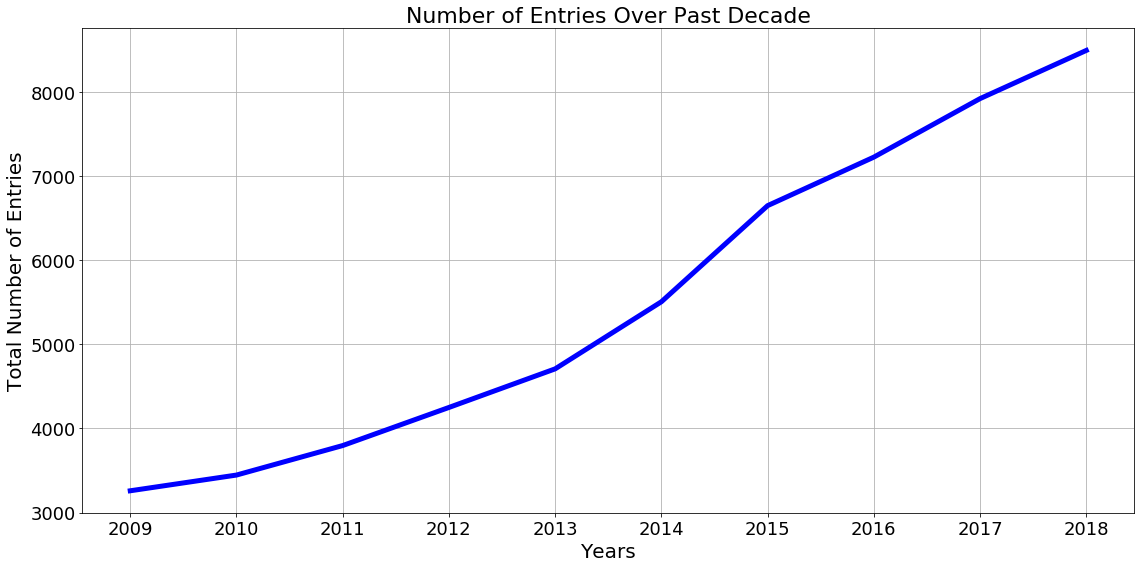

In [113]:
df = all_winner_data


# Adding "key" column to remove dupes for total entries per category/year (Brian)
# Since each category has 3 medals - Gold, Silver, Bronze - by not removing dupes, we'd have inflated numbers

df["key"] = df["category"] + df["year"].map(str)
unq_entry_count = df.drop_duplicates(subset="key", keep="first")
year_grp = unq_entry_count.groupby("year")

entries_sum = year_grp["total_category_entries"].sum()
year = year_grp["year"].unique()

x_axis = year
y_axis = entries_sum
tick_locs = []
for x in x_axis:
    tick_locs.append(x)
print("")
plt.figure(figsize=(16,8))
plt.plot(x_axis, y_axis, color="blue", linewidth=5)

plt.xticks(tick_locs, size=18)
plt.yticks(size=18)
plt.title("Number of Entries Over Past Decade", size=22)
plt.xlabel("Years", size=20)
plt.ylabel("Total Number of Entries", size=20)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot # 2 - Categories Over the Past 10 Years

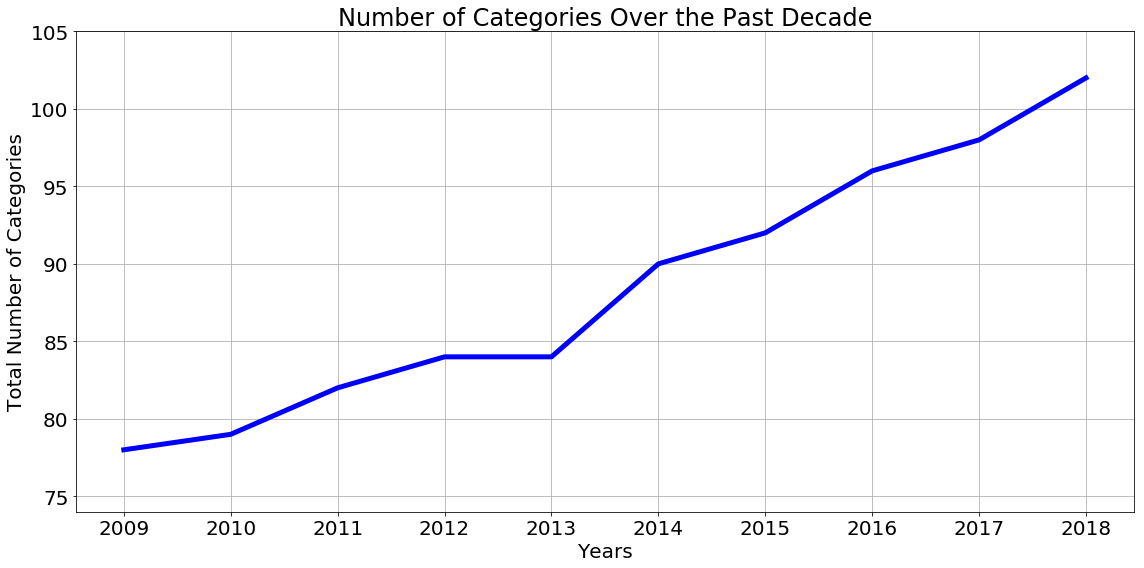

In [112]:
category_count = year_grp["category"].count()
y_axis = category_count
plt.figure(figsize=(16,8))
plt.plot(x_axis, y_axis, color="blue", linewidth=5)

print("")
plt.xticks(tick_locs, size=20)
plt.yticks(size=20)
plt.title("Number of Categories Over the Past Decade", size=24)
plt.xlabel("Years", size=20)
plt.ylabel("Total Number of Categories", size=20)
plt.ylim(74, 105)
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
df2 = df[["year","category","total_category_entries","key"]].copy()
unq_df2 = df2.drop_duplicates(subset="key", keep="first")
unq_df2 = unq_df2.drop(["key"],axis=1)

df_agg = unq_df2.groupby(["year","category"]).agg({"total_category_entries":sum})
a=df_agg["total_category_entries"].groupby(level=0,group_keys=False)

top_3 = a.nlargest(3)
top_3
top_df = pd.DataFrame(top_3).reset_index()
top_df

,year,category,total_category_entries
0,2009,American-Style India Pale Ale,134
1,2009,Wood- and Barrel-Aged Strong Beer,110
2,2009,American Style Pale Ale,108
3,2010,American-Style India Pale Ale,142
4,2010,American-Style Pale Ale,109
5,2010,Imperial India Pale Ale,97
6,2011,American-Style India Pale Ale,176
7,2011,Wood- and Barrel-Aged Strong Beer,118
8,2011,American-Style Pale Ale,105
9,2012,American-Style India Pale Ale,203


### Plot # 3 - Most Popular Categories of the Last Decade

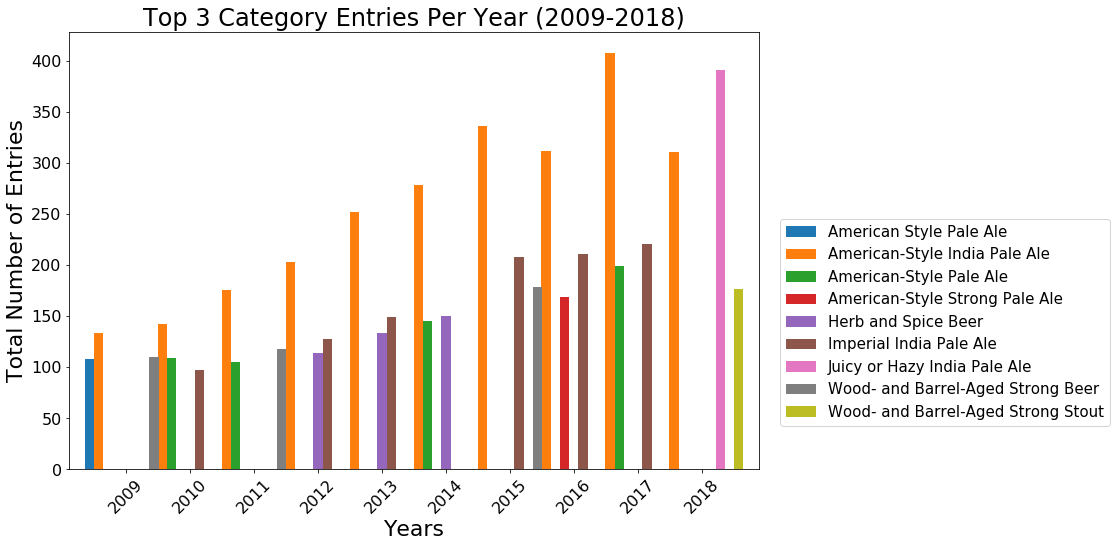

In [179]:
top_pivot = top_df.pivot(index='year', columns='category', values='total_category_entries').plot(kind='bar', width=1.3, 
                                                                                                 figsize=(16,8))

print("")
plt.legend(loc =(1.03,0.1), prop={'size':15})

plt.title("Top 3 Category Entries Per Year (2009-2018)", size=24)
plt.xlabel("Years", size=22)
plt.ylabel("Total Number of Entries", size=22)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
# plt.grid(True)
plt.tight_layout()
plt.show()
print("")

### But enough about beers on the national level. Let's start narrowing our focus a bit here...
### How many beers brewed in California have won a medal?

In [48]:
ca = all_winner_data[all_winner_data['state'] == 'CA']
ca.reset_index(inplace=True)

ca_number = ca['index'].count()
print(f'There have been {ca_number} award-winning* beers in California in the last decade.')

cal_data = ca.drop(columns=['index'],axis=1)
cal_data = cal_data.sort_values('year', ascending=False)
cal_data.reset_index(inplace=True)
cal_data = cal_data.drop(columns=['index'],axis=1)
cal_data.head()

There have been 553 award-winning* beers in California in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Bronze,Eclipse,FiftyFifty Brewing Co.,Truckee,Nevada,CA,Wood- and Barrel-Aged Strong Stout,2018,177,Wood- and Barrel-Aged Strong Stout2018
1,Bronze,Nighthawk,Enegren Brewing Co.,Moorpark,Ventura,CA,Dark Lager,2018,62,Dark Lager2018
2,Silver,Sour Cherry Sour,Hermitage Brewing Co.,San Jose,Graham,CA,Fruited Wood- and Barrel-Aged Sour Beer,2018,102,Fruited Wood- and Barrel-Aged Sour Beer2018
3,Bronze,Kumquat Saison,Smog City Brewing Wood Cellar,Torrance,Los Angeles,CA,Belgian-Style Fruit Beer,2018,65,Belgian-Style Fruit Beer2018
4,Silver,The Shroud,Bravery Brewing,Lancaster,Los Angeles,CA,Imperial Stout,2018,86,Imperial Stout2018


### Finally, we get to the interesting stuff!
### How many beers brewed in San Diego have won a medal?

In [49]:
temp = cal_data[cal_data['county'] == 'San Diego']
temp.reset_index(inplace=True)
sd_number = temp['index'].count()
print(f'There have been {sd_number} award-winning* beers in San Diego in the last decade.')
sd_data = temp.drop(columns=['index'], axis=1)
sd_data = sd_data.sort_values('year', ascending=False)
sd_data.reset_index(inplace=True)
sd_data = sd_data.drop(columns=['index'],axis=1)
sd_data.head(10)

There have been 148 award-winning* beers in San Diego in the last decade.


,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Silver,Oats,Pizza Port Solana Beach,Solana Beach,San Diego,CA,Oatmeal Stout,2018,59,Oatmeal Stout2018
1,Gold,Natural Bridge: Vienna Lager,Eppig Brewing,San Diego,San Diego,CA,Session Beer,2018,50,Session Beer2018
2,Gold,Liquid AC,Karl Strauss Brewing Co. - La Jolla,La Jolla,San Diego,CA,English-Style Summer Ale,2018,61,English-Style Summer Ale2018
3,Bronze,Bird Park,North Park Beer Co.,San Diego,San Diego,CA,Bohemian-Style Pilsener,2018,84,Bohemian-Style Pilsener2018
4,Bronze,Chocolate Macadamia Nut Stout,Kilowatt Brewing,San Diego,San Diego,CA,Chocolate Beer,2018,59,Chocolate Beer2018
5,Gold,Rye Dawn,Breakwater Brewing Co.,Oceanside,San Diego,CA,Rye Beer,2018,57,Rye Beer2018
6,Silver,Groundswell Piloncillo Brown Ale,Groundswell Brewing Co.,Santee,San Diego,CA,American-Style Brown Ale,2018,76,American-Style Brown Ale2018
7,Bronze,Know Ego,Groundswell Brewing Co.,Santee,San Diego,CA,Classic Irish-Style Dry Stout,2018,54,Classic Irish-Style Dry Stout2018
8,Bronze,Rail Gun Wee Heavy,BNS Brewing & Distilling Co.,Santee,San Diego,CA,Old Ale or Strong Ale,2018,37,Old Ale or Strong Ale2018
9,Gold,The Coachman,Societe Brewing Co.,San Diego,San Diego,CA,Session India Pale Ale,2018,92,Session India Pale Ale2018


### In terms of medals won, what are the top 5 breweries in California?

In [50]:
medals_cal = cal_data.groupby(['brewery'])['medal'].count()
top_brew_cal = medals_cal.sort_values(ascending=False)
top_5_cal = top_brew_cal.head()
cc = pd.DataFrame(top_5_cal)
top_5_cal_df = cc.rename(index=str, columns={"medal": "medal count"})
top_5_cal_df.reset_index()

,brewery,medal count
0,Firestone Walker Brewing Co.,28
1,Pizza Port Carlsbad,24
2,Pabst Brewing Co.,12
3,Pizza Port Ocean Beach,12
4,Beachwood BBQ & Brewing,11


### In terms of medals won, what are the top 5 breweries in San Diego?

In [51]:
medals_sd = sd_data.groupby(['brewery'])['medal'].count()
top_brew_sd = medals_sd.sort_values(ascending=False)
top_5_sd = top_brew_sd.head()
zz = pd.DataFrame(top_5_sd)
top_5_sd_df = zz.rename(index=str, columns={"medal": "medal count"})
top_5_sd_df.reset_index()

,brewery,medal count
0,Pizza Port Carlsbad,24
1,AleSmith Brewing Co.,10
2,The Lost Abbey,9
3,Pizza Port Solana Beach,8
4,Pizza Port Ocean Beach,7





### Why is there a discrepancy between the San Diego list and the California list?
### Let's find out!




In [52]:
pizza_port = all_winner_data[all_winner_data['brewery'] == 'Pizza Port Ocean Beach']
pizza_port = pizza_port.sort_values('year', ascending=False)
pizza_port.reset_index(inplace=True)
pizza_port = pizza_port.drop(columns=['index'],axis=1)
pizza_port

,medal,beer_name,brewery,city,county,state,category,year,total_category_entries,key
0,Gold,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2017,40,Session Beer2017
1,Bronze,Bacon and Eggs,Pizza Port Ocean Beach,San Diego,San Diego,CA,Coffee Beer,2015,149,Coffee Beer2015
2,Bronze,Guillaume,Pizza Port Ocean Beach,San Diego,San Diego,CA,Session Beer,2015,44,Session Beer2015
3,Silver,Guillaume,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2014,94,Session Beer2014
4,Bronze,La Flama Dorada,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Belgian-Style Tripel,2014,58,Belgian-Style Tripel2014
5,Gold,Beer Hunter,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Session Beer,2013,56,Session Beer2013
6,Silver,Rhino Chaser,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,Imperial Red Ale,2013,56,Imperial Red Ale2013
7,Bronze,Kung Fu Elvis,Pizza Port Ocean Beach,Ocean Beach,Suffolk,CA,American-Style Strong Pale Ale,2013,120,American-Style Strong Pale Ale2013
8,Gold,Skidmark Brown Ale,Pizza Port Ocean Beach,San Diego,San Diego,CA,English-Style Mild Ale,2011,25,English-Style Mild Ale2011
9,Bronze,Z-Man Stout,Pizza Port Ocean Beach,San Diego,San Diego,CA,Foreign-Style Stout,2011,23,Foreign-Style Stout2011


### From 2013 to 2014, we hypothesize that the incorrect [Ocean Beach](https://en.wikipedia.org/wiki/Ocean_Beach,_New_York) was used to label the medal-winning beer's origin.
### Regardless of how careful we were with the data, it seems to have been incorrectly entered!
### As we can see, input error can throw off our numbers, which will then throw off our calculations.

### Now just for fun,
### What are the top 5 breweries in the United States?

In [25]:
medals_us = all_winner_data.groupby(['brewery'])['medal'].count()
top_brew_us = medals_us.sort_values(ascending=False)
top_5_us = top_brew_us.head()
vv = pd.DataFrame(top_5_us)

top_5_us_df = vv.rename(index=str, columns={"medal": "medal count"})
top_5_us_df.reset_index()

,brewery,medal count
0,Firestone Walker Brewing Co.,28
1,Pizza Port Carlsbad,24
2,Sun King Brewing Co.,19
3,Pabst Brewing Co.,19
4,Chuckanut Brewery,18


### Celebration of Carlsbad

In [65]:
carl = all_winner_data.loc[all_winner_data['brewery'] == 'Pizza Port Carlsbad']
carls = carl.groupby(['category'])['medal']
carlsb = carls.count()
carlsba = pd.DataFrame(carlsb)
carlsbad = carlsba.reset_index()
carlsbad

,category,medal
0,American Style Brown Ale,1
1,American-Style Brown Ale,1
2,Belgian Style Strong Specialty Ale,1
3,Belgian-Style Strong Specialty Ale,2
4,Classic Irish-Style Dry Stout,1
5,Coffee Beer,1
6,Coffee Flavored Beer,1
7,English Style Brown Ale,1
8,English-Style Brown Ale,2
9,English-Style India Pale Ale,2


### We need to combine categories in order to get a more accurate breakdown of Pizza Port Carlsbad's accomplishments.

In [159]:
carlsbad = carlsbad.replace({"American Style Brown Ale": "American-Style Brown Ale",
                            "Belgian Style Strong Specialty Ale": "Belgian-Style Strong Specialty Ale",
                            "Coffee Flavored Beer": "Coffee Beer",
                            "English Style Brown Ale": "English-Style Brown Ale"})
carlsbad
carlsbad2 = carlsbad.groupby(['category'])['medal'].sum()
carlsbad3 = pd.DataFrame(carlsbad2)
carlsbad4 = carlsbad3.reset_index()
carlsbad5 = carlsbad4.sort_values('medal', ascending=False)
carlsbad_df = carlsbad5.reset_index(drop=True)
carlsbad_df

,category,medal
0,Belgian-Style Strong Specialty Ale,3
1,English-Style Brown Ale,3
2,Imperial Red Ale,3
3,American-Style Brown Ale,2
4,Coffee Beer,2
5,English-Style India Pale Ale,2
6,Export Stout,2
7,Scotch Ale,2
8,Session Beer,2
9,Classic Irish-Style Dry Stout,1


### Plot # 4 - Every Category that Pizza Port Carlsbad has Earned a Medal In

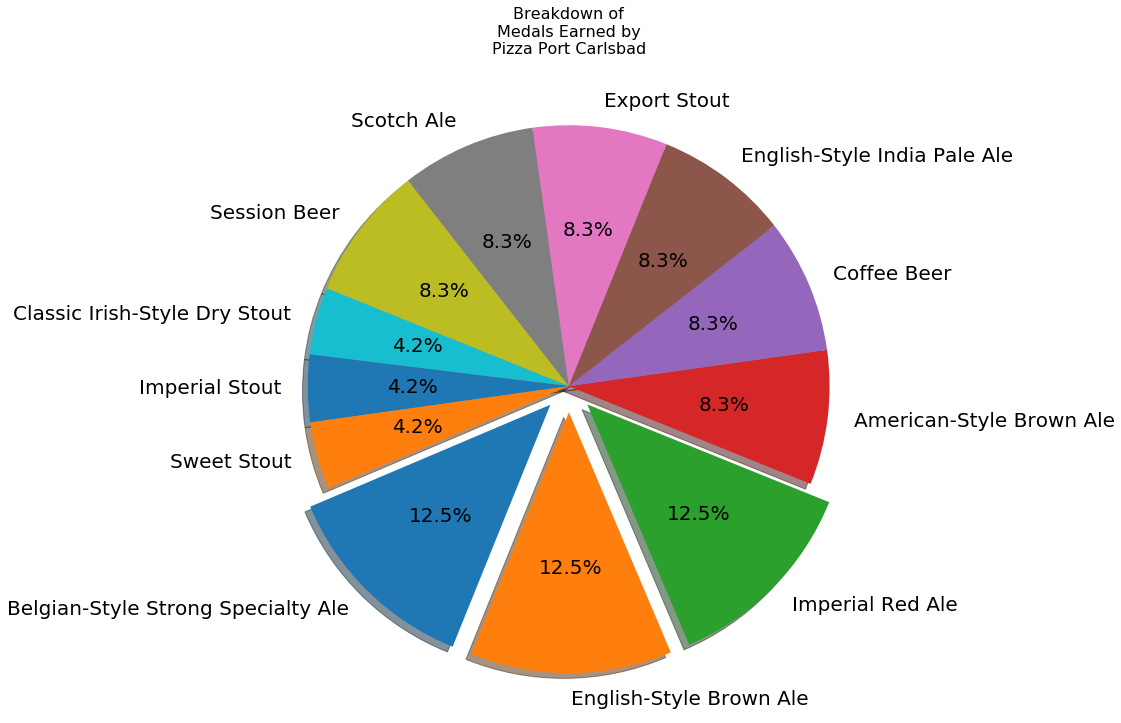

In [160]:
labels = carlsbad_df['category']
medals = carlsbad_df['medal']
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
print("")
plt.figure(figsize=(24,12))
plt.pie(medals, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=203)
plt.title("Breakdown of\n" + "Medals Earned by\n" + "Pizza Port Carlsbad", size=16)
# plt.rcParams['font.size'] = 20
plt.show()

### Breaking down medals won from San Diego breweries

In [56]:
sd_medals = sd_data.groupby(['medal'])['year'].count()
ca_medals = cal_data.groupby(['medal'])['year'].count()
all_medals = all_winner_data.groupby(['medal'])['year'].count()

medals_df = pd.DataFrame({"SD medals won": sd_medals,
                         "CA medals won": ca_medals,
                         "All US won": all_medals})

medals_df['SD expected'] = [49, 49, 49]
medals_df['CA expected'] = [184, 184, 184]
medals_df['US expected'] = [882, 882, 882]

sd_df = medals_df[['SD medals won', 'SD expected']]
sd_df

,SD medals won,SD expected
medal,,
Bronze,49,49
Gold,58,49
Silver,41,49


### Chi-Square Test #1 - San Diego

In [58]:
crit_sd = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_sd}')
stats.chisquare(sd_df['SD medals won'], sd_df['SD expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=2.9591836734693877, pvalue=0.2277306206904969)

### Conclusion
* Since the chi-square value of 2.96 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* If you were handed a randomly-chosen award-winning beer in San Diego, CA, it is just as likely to be a gold-medal beer as a bronze-medal beer or silver-medal beer.


### Breakdown of medals won from California breweries

In [59]:
ca_df = medals_df[['CA medals won', 'CA expected']]
ca_df

,CA medals won,CA expected
medal,,
Bronze,186,184
Gold,185,184
Silver,182,184


### Chi-Square Test #2 - California

In [60]:
crit_ca = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_ca}')
stats.chisquare(ca_df['CA medals won'], ca_df['CA expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=0.048913043478260865, pvalue=0.9758401158271994)

### Conclusion
* Since the chi-square value of 0.05 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* With a p-value of 0.976, the distribution of medals won throughout all of California is roughly [uniform](http://mathworld.wolfram.com/UniformDistribution.html).
* If you were handed a randomly-chosen award-winning beer from California, there is a 1/3 chance of it winning a gold medal, a 1/3 chance of it winning a silver medal, and a 1/3 chance of it winning a bronze medal.


### Breakdown of medals won from all breweries in the United States

In [61]:
us_df = medals_df[['All US won', 'US expected']]
us_df

,All US won,US expected
medal,,
Bronze,886,882
Gold,878,882
Silver,882,882


### Chi-Square Test #3 - United States

In [62]:
crit_us = stats.chi2.ppf(q = 0.95, df = 2)
print(f'The critical value for medal frequency is {crit_us}')
stats.chisquare(us_df['All US won'], us_df['US expected'])

The critical value for medal frequency is 5.991464547107979


Power_divergenceResult(statistic=0.036281179138321996, pvalue=0.982022960467876)

### Conclusion
* Since the chi-square value of 0.05 at a confidence level of 95% does not exceed the critical value of 5.99, we conclude that the differences seen in the number of wins per medal are not statistically significant.
* With a p-value of 0.982, the number of medals won throughout all of the United States is more [uniformly distributed](http://mathworld.wolfram.com/UniformDistribution.html) than the number of medals won in California.
* A randomly-selected medal-winning beer brewed within the United States has an even chance of winning either a gold medal, a silver medal, or a bronze medal.

### Plot # 5 - San Diego vs. The World (or at least, the rest of the United States)


San Diego, CA was awarded a total of 16 out of 306 medals.


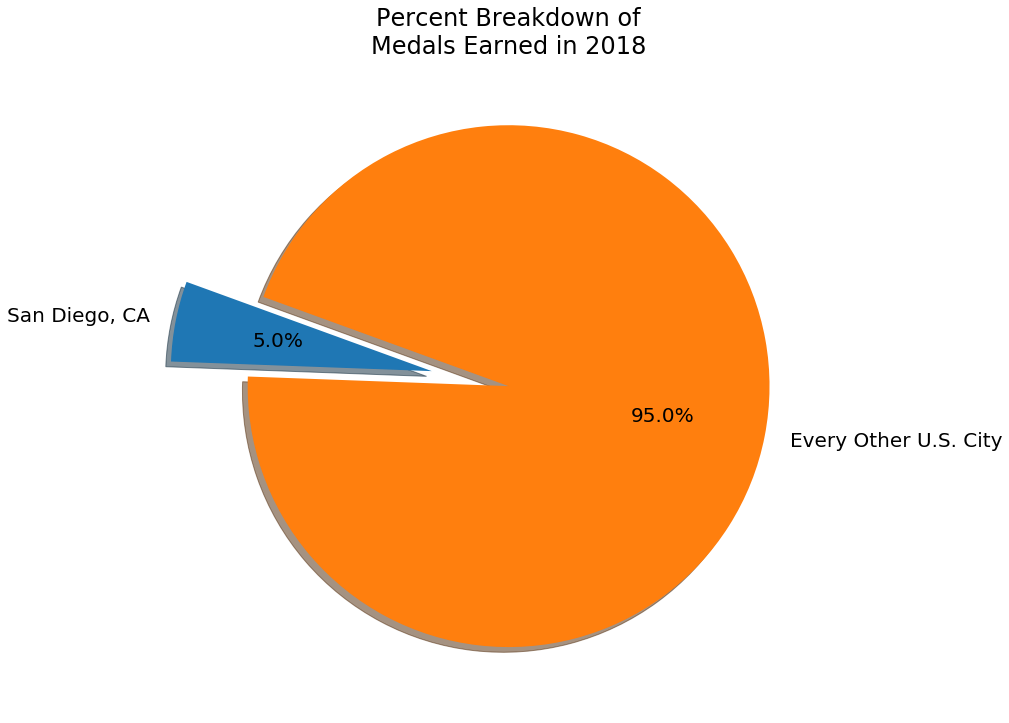

In [184]:
# Did San Diego show up as the best in the U.S. for 2018? 

total_entries_us = all_winner_data.groupby(['year'])['total_category_entries'].count()
total_entries_cal = cal_data.groupby(['year'])['total_category_entries'].count()
total_entries_sd = sd_data.groupby(['year'])['total_category_entries'].count()

bweh = sd_data.loc[sd_data['year'] == 2018]
sd_2018 = bweh[['medal', 'beer_name', 'brewery', 'category', 'total_category_entries']]

medals_2018 = all_winner_data.loc[all_winner_data['year'] == 2018]
all_2018 = medals_2018[['medal', 'beer_name', 'brewery', 'category', 'total_category_entries']]

x = sd_2018['medal'].count()
y = all_2018['medal'].count()
print("")
print(f'San Diego, CA was awarded a total of {x} out of {y} medals.')

labels = 'San Diego, CA','Every Other U.S. City'
sizes = [x,y]
explode = (0.3,0)
# plt.rcParams['font.size'] = 20
plt.figure(figsize=(24,12))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=160)
plt.title("Percent Breakdown of\n" + "Medals Earned in 2018")
plt.show()

### Plot # 6 - Showcase of Medals Won From San Diego Breweries

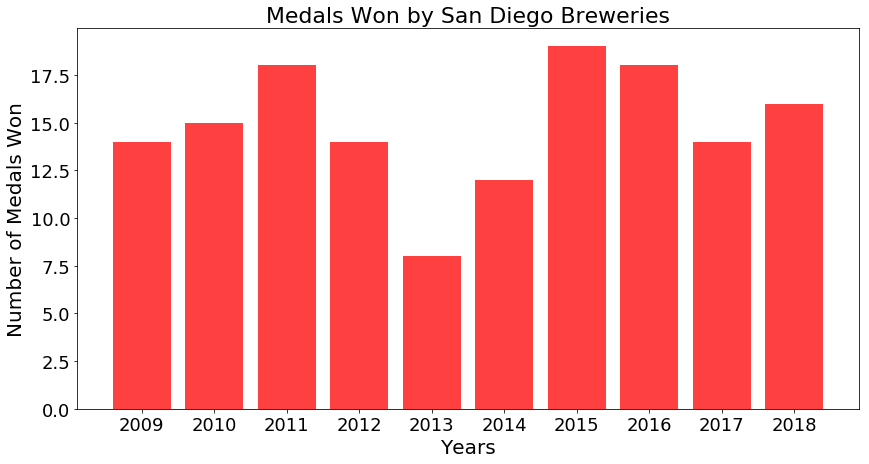

In [171]:
total_entries_sd = sd_data.groupby(['year'])['total_category_entries'].count()
# print("")
# print('total SD entries')
# print(total_entries_sd)


sd_data2 = sd_data.sort_values('year', ascending=True)
year = sd_data2["year"].unique()
# print(year)

# x = year
y = total_entries_sd
ticks = []
for i in year:
    ticks.append(i)
print("")
plt.figure(figsize=(14,7))
plt.bar(year, y, facecolor="red", alpha=0.75, align="center")
plt.xticks(ticks, size=18)
plt.yticks(size=18)
plt.title("Medals Won by San Diego Breweries", size=22)
plt.xlabel("Years", size=20)
plt.ylabel("Number of Medals Won", size=20)
plt.show()

In [185]:
aleq = pd.DataFrame(top_brew_sd)
ale = aleq.reset_index()
ale = ale.replace({"Monkey Paw Brewing Co.": "Other",
                        "Kilowatt Brewing": "Other",
                        "Monkey Paw Brewing": "Other",
                        "Mother Earth Brew Co.": "Other",
                        "North Park Beer Co.": "Other",
                        "OB Brewery": "Other",
                        "Ocean Beach Brewery": "Other",
                        "Oceanside Ale Works": "Other",
                        "Pizza Port Bressi Ranch": "Other",
                        "Port Brewing Co. / The Lost Abbey": "Other",
                        "Pure Project": "Other",
                        "Rock Bottom Brewery - La Jolla": "Other",
                        "Saint Archer Brewing Co.": "Other",
                        "South Park Brewing - CA": "Other",
                        "SouthNorte Beer Co.": "Other",
                        "The Beer Co.": "Other",
                        "Karl Strauss Brewing Co. - Carlsbad": "Other",
                        "Home Brewing Co.": "Other",
                        "URBN St. Brewing Co.": "Other",
                        "BNS Brewing & Distilling Co.": "Other",
                        "Rip Current Brewery": "Other",
                        "Karl Strauss Brewing Co. - La Jolla": "Other",
                        "Karl Strauss Brewing Co.": "Other",
                        "Societe Brewing Co.": "Other",
                        "Ballast Point Brewing & Spirits - Scripps Ranch": "Other",
                        "Stone Brewing World Bistro & Gardens - Liberty Station": "Other",
                        "Bagby Beer Co.": "Other",
                        "Breakwater Brewing Co.": "Other",
                        "Second Chance Beer Co.": "Other",
                        "Karl Strauss Brewing Co. - San Diego": "Other",
                        "Benchmark Brewing Co.": "Other",
                        "Duck Foot Brewing Co.": "Other",
                        "Stone Brewing Co.": "Other",
                        "Groundswell Brewing Co.": "Other",
                        "Ballast Point Brewing Co.": "Other",
                        "New English Brewing Co.": "Other",
                        "Culture Brewing Co.": "Other",
                        "Eppig Brewing": "Other",
                        "Ballast Point Brewing Co": "Other",
                        "Alpine Beer Co.": "Other",
                        "Coronado Brewing Company Brewpub": "Other",
                        "Brit Antrim Benefit Beer Pizza Port Ocean Beach": "Other",
                        "Ballast Point Brewing Co. - Home Brew Mart": "Other",
                        "Burgeon Beer Co.": "Other",
                  "Green Flash Brewing Co.": "Other",
                  "Port Brewing Co.": "Other"})

# Count of all SD breweries
sd_brewery_count = ale['brewery'].count()
others_count = sd_brewery_count - 5

ale2 = ale.groupby(['brewery'])['medal'].sum()
ale3 = pd.DataFrame(ale2)
ale4 = ale3.reset_index()
ale5 = ale4.sort_values('medal', ascending=False)
ale6 = ale5.reset_index(drop=True)
ale7 = pd.DataFrame(ale6)
ale8 = ale7.reset_index()
ale_df = ale8.sort_values('medal', ascending=False)
ale_df

,index,brewery,medal
0,0,Other,90
1,1,Pizza Port Carlsbad,24
2,2,AleSmith Brewing Co.,10
3,3,The Lost Abbey,9
4,4,Pizza Port Solana Beach,8
5,5,Pizza Port Ocean Beach,7


### Plot # 7 - Elite [5]


Compared to the other 46 breweries, the top 5 breweries won roughly 40% of all medals earned by San Diego County.



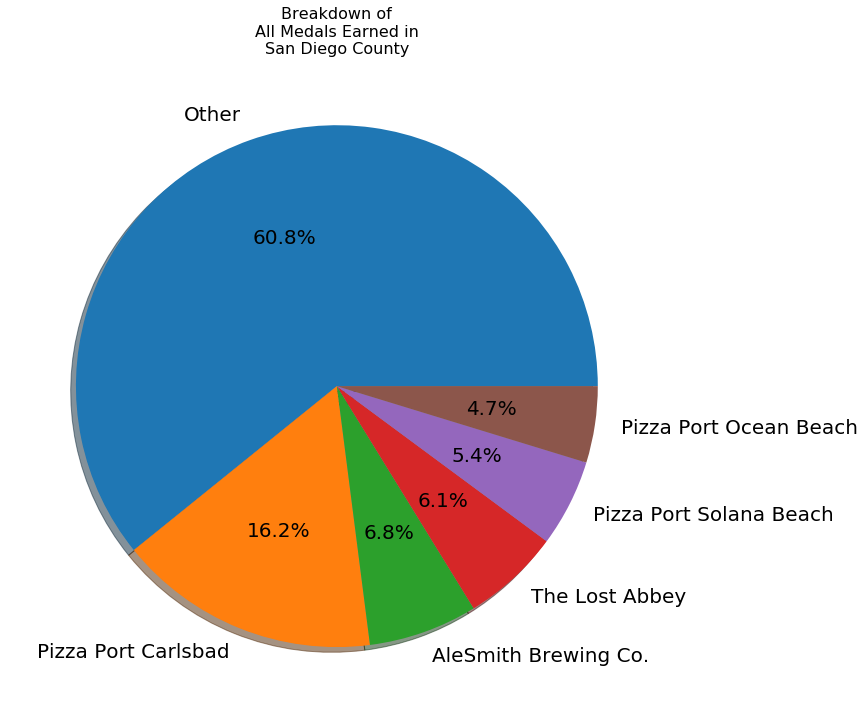

In [186]:
labels = ale_df['brewery']
medals = ale_df['medal']
# explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
print("")
print(f'Compared to the other {others_count} breweries, the top 5 breweries won roughly 40% of all medals earned by San Diego County.')
print("")
plt.figure(figsize=(24,12))
plt.pie(medals, 
        #explode=explode, 
        labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Breakdown of\n" + "All Medals Earned in\n" + "San Diego County", size=16)
# plt.rcParams['font.size'] = 20
plt.show()

## Now, where exactly are these award-winning breweries in San Diego County?